Fetching imports

In [25]:
import numpy as np
import pandas as pd
from parameters import GlobalParameters
from input_data import InputData
from site_class import Site
from scenarios import Scenarios
from sub_problem_class import SubProblem
from master_poblem import MasterProblem

Declaring test objects

In [26]:

input_test =InputData()
scenarios_test = Scenarios(input_test.temperatures_df)
site_test_1 = Site(
    scenario_temperatures=scenarios_test.scenario_temperatures_per_site_df.loc["Senja"],
    capacity=1000,
    init_biomass=100,
    TGC_array=input_test.TGC_df.iloc[0],
    smolt_weights=[150, 200, 250],
    weight_req_for_harvest = 3000.0
)

site_test_2 = Site(
    scenario_temperatures=scenarios_test.scenario_temperatures_per_site_df.loc["Nord-Troms"],
    capacity=1200,
    init_biomass=0,
    TGC_array=input_test.TGC_df.iloc[0],
    smolt_weights=[150, 200, 250],
    weight_req_for_harvest=3000.0
)

site_test_3 = Site(
    scenario_temperatures=scenarios_test.scenario_temperatures_per_site_df.loc["Vesteralen"],
    capacity=1200,
    init_biomass=0,
    TGC_array=input_test.TGC_df.iloc[0],
    smolt_weights=[150, 200, 250],
    weight_req_for_harvest=3000.0
)


sub_problem_test_1 = SubProblem(
    input_data_obj=input_test,
    parameters_obj= GlobalParameters(),
    scenarios_obj=scenarios_test,
    site_obj=site_test_1
)


sub_problem_test_2 = SubProblem(
    input_data_obj=input_test,
    parameters_obj=GlobalParameters(),
    scenarios_obj=scenarios_test,
    site_obj=site_test_2
)

sub_problem_test_3 = SubProblem(
    input_data_obj=input_test,
    parameters_obj=GlobalParameters(),
    scenarios_obj=scenarios_test,
    site_obj=site_test_3
)


Running the sub_problems

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 14233 rows, 14820 columns and 30146 nonzeros
Model fingerprint: 0x81f8a043
Variable types: 14460 continuous, 360 integer (360 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+08]
  Objective range  [1e-01, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+06]
Found heuristic solution: objective -0.0000000
Presolve removed 11824 rows and 13651 columns
Presolve time: 0.09s
Presolved: 2409 rows, 1169 columns, 9994 nonzeros
Found heuristic solution: objective 1800000.0000
Variable types: 948 continuous, 221 integer (221 binary)

Root relaxation: objective 6.951625e+07, 4350 iterations, 0.32 seconds (0.48 work units)

Interrupt request received

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap 

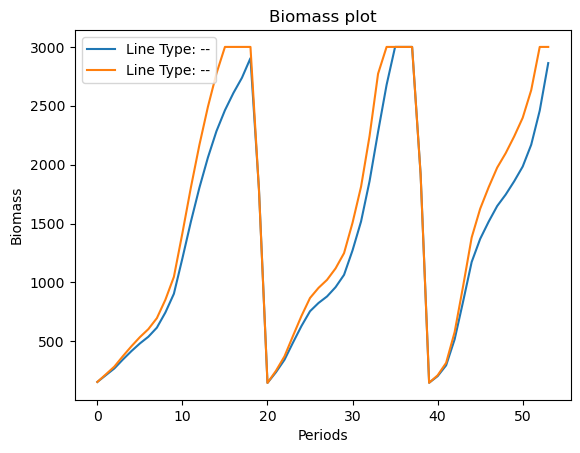

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 14399 rows, 14820 columns and 30146 nonzeros
Model fingerprint: 0xef792579
Variable types: 14460 continuous, 360 integer (360 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+08]
  Objective range  [1e-01, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+06]
Found heuristic solution: objective -0.0000000
Presolve removed 12144 rows and 13882 columns
Presolve time: 0.16s
Presolved: 2255 rows, 938 columns, 9002 nonzeros
Found heuristic solution: objective 1800000.0000
Variable types: 725 continuous, 213 integer (213 binary)

Root relaxation: objective 6.075175e+07, 3096 iterations, 0.26 seconds (0.27 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 

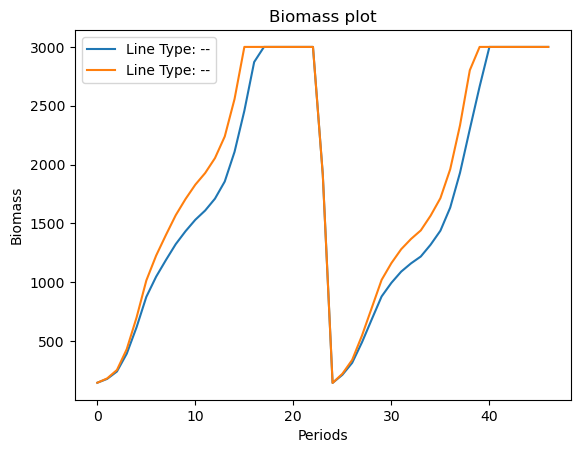

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 14085 rows, 14820 columns and 30146 nonzeros
Model fingerprint: 0x8d0f998c
Variable types: 14460 continuous, 360 integer (360 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+08]
  Objective range  [1e-01, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+06]
Found heuristic solution: objective -0.0000000
Presolve removed 11594 rows and 13452 columns
Presolve time: 0.10s
Presolved: 2491 rows, 1368 columns, 10684 nonzeros
Found heuristic solution: objective 1800000.0000
Variable types: 1143 continuous, 225 integer (225 binary)

Root relaxation: objective 7.309807e+07, 5029 iterations, 0.36 seconds (0.55 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0    

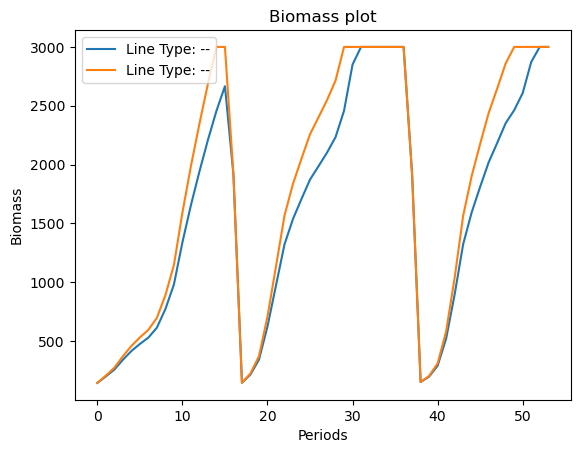

In [27]:
sub_problem_test_1.solve_and_print_model()
sub_problem_test_2.solve_and_print_model()
sub_problem_test_3.solve_and_print_model()

Concatenating into some a commond dataframe


In [28]:
df_1 = sub_problem_test_1.get_second_stage_variables_df(sub_problem_test_1.get_deploy_period_list())
df_2 = sub_problem_test_2.get_second_stage_variables_df(sub_problem_test_2.get_deploy_period_list())
df_3 = sub_problem_test_3.get_second_stage_variables_df(sub_problem_test_3.get_deploy_period_list())

df = pd.concat([df_1,df_2, df_3], keys=["Nord-troms", "Senja", "Vesteralen"])

df.index.names = ["Location", "Scenario", "Smolt type", "Deploy Period", "Period"]



                                                                          X  \
Location   Scenario   Smolt type   Deploy Period    Period                    
Nord-troms Scenario 0 Smolt Type 0 Deploy period 0  Period 0   1.540683e+05   
                                                    Period 1   2.115079e+05   
                                                    Period 2   2.688966e+05   
                                                    Period 3   3.446483e+05   
                                                    Period 4   4.157122e+05   
...                                                                     ...   
Vesteralen Scenario 1 Smolt Type 0 Deploy period 42 Period 55  3.000000e+06   
                                                    Period 56  3.000000e+06   
                                                    Period 57  3.000000e+06   
                                                    Period 58  1.720982e+06   
                                                    

Creating an instance of the master problem


In [31]:
print(df)
master_problem_test = MasterProblem(
    parameters=GlobalParameters(),
    scenarios=scenarios_test,
    initial_column= df
)



                                                                          X  \
Location   Scenario   Smolt type   Deploy Period    Period                    
Nord-troms Scenario 0 Smolt Type 0 Deploy period 0  Period 0   1.540683e+05   
                                                    Period 1   2.115079e+05   
                                                    Period 2   2.688966e+05   
                                                    Period 3   3.446483e+05   
                                                    Period 4   4.157122e+05   
...                                                                     ...   
Vesteralen Scenario 1 Smolt Type 0 Deploy period 42 Period 55  3.000000e+06   
                                                    Period 56  3.000000e+06   
                                                    Period 57  3.000000e+06   
                                                    Period 58  1.720982e+06   
                                                    

Testing

In [30]:
master_problem_test.columns.to_excel("master_problem.xlsx", index=True)

AttributeError: 'NoneType' object has no attribute 'to_excel'